**Assignment 1 - Titanic data analysis**

* Import data from drive or somewhere else
* Basic statistics
* Graphical analysis

**Dataset description**

* survival - Survival (0 = No; 1 = Yes)
* class - Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
* name - Name
* sex - Sex
* age - Age
* sibsp - Number of Siblings/Spouses Aboard
* parch - Number of Parents/Children Aboard
* ticket - Ticket Number
* fare - Passenger Fare
* cabin - Cabin
* embarked - Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)
* boat - Lifeboat (if survived)
* body - Body number (if did not survive and body was recovered)

In [323]:
#Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

In [324]:
titanic = pd.read_excel("titanic_dataset.xls")
titanic.shape

(1309, 14)

In [325]:
titanic = titanic.dropna(subset=['age'])
titanic.shape

(1046, 14)

In [326]:
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [327]:
#Total Quantity
quantity_data = {
    "male": len(titanic[titanic['sex']=='male']),
    "female": len(titanic[titanic['sex']=='female']),
    "first": len(titanic[titanic['pclass']==1]),
    "second": len(titanic[titanic['pclass']==2]),
    "third": len(titanic[titanic['pclass']==3]),
}
quantity_df = pd.DataFrame(quantity_data, index=[0])
quantity_df

,male,female,first,second,third
0,658,388,284,261,501


In [328]:
#Total survived
survived = titanic[titanic['survived']==1]
survived_data = {
    "male": len(survived[survived['sex']=='male']),
    "female": len(survived[survived['sex']=='female']),
    "first": len(survived[survived['pclass']==1]),
    "second": len(survived[survived['pclass']==2]),
    "third": len(survived[survived['pclass']==3]),
}
survived_df = pd.DataFrame(survived_data, index=[0])
survived_df

,male,female,first,second,third
0,135,292,181,115,131


In [329]:
#Total not survived
not_survived = titanic[titanic['survived']==0]
not_survived_data = {
    "male": len(not_survived[not_survived['sex']=='male']),
    "female": len(not_survived[not_survived['sex']=='female']),
    "first": len(not_survived[not_survived['pclass']==1]),
    "second": len(not_survived[not_survived['pclass']==2]),
    "third": len(not_survived[not_survived['pclass']==3]),
}
not_survived_df = pd.DataFrame(not_survived_data, index=[0])
not_survived_df

,male,female,first,second,third
0,523,96,103,146,370


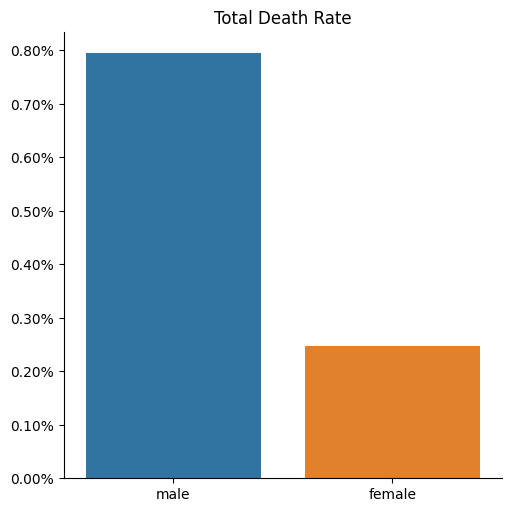

In [330]:
#Total death rate
res = not_survived_df/quantity_df
res[['male', 'female']]
fig = sns.catplot(data=res[['male', 'female']], kind='bar')

# Define o formato do eixo y como porcentagem para cada facet
for ax in fig.axes.flat:
    ax.yaxis.set_major_formatter(mtick.PercentFormatter())

# Define o título do gráfico
fig.set(title='Total Death Rate')


In [344]:
num_of_children = titanic[titanic['age']<15]
adults = titanic[titanic['age']>=15]
num_of_adults_male = adults[adults['sex']=='male']
num_of_adults_female = adults[adults['sex']=='female']

print("Number of children: "+str(num_of_children.shape[0]))
print("Number of adults male: "+str(num_of_adults_male.shape[0]))
print("Number of adults female: "+str(num_of_adults_female.shape[0]))


Number of children: 109
Number of adults male: 600
Number of adults female: 337


In [349]:
condition = titanic['age']<15
titanic.loc[condition, 'sex'] = 'child'

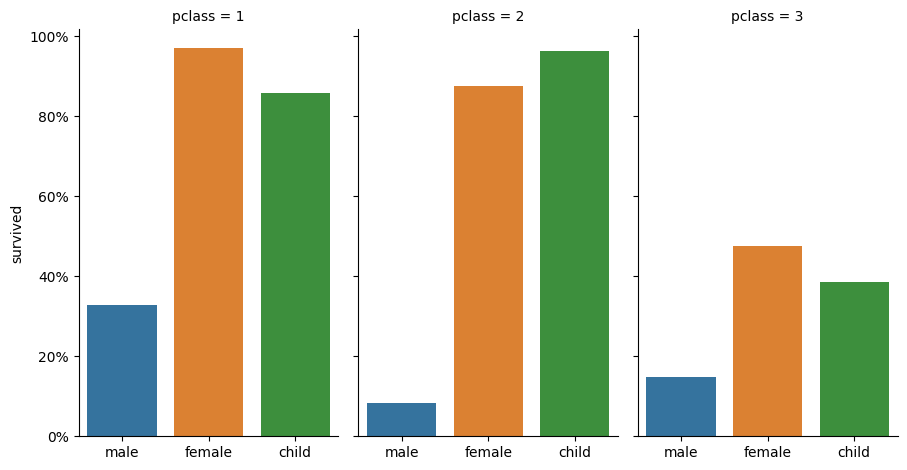

In [384]:
new_order = ['male', 'female', 'child']
titanic['sex'] = pd.Categorical(titanic['sex'], categories=new_order, ordered=True)

fig = sns.catplot(data=titanic, x='sex', y='survived', col="pclass", kind='bar', saturation=.7, errorbar=None, aspect=.6)



for ax in fig.axes.flat:
    ax.xaxis.set_label_text('')
    ax.yaxis.set_major_formatter(mtick.PercentFormatter(1))
